<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [ ]:
# type your code here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats


#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [ ]:
# load the csv file
df= pd.read_csv('/content/Life_Expectancy.csv')
df.head()
# type your code here

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [ ]:
cols=list(df.columns)
df.columns=[col.strip() for col in cols]
df=df.set_index('Country')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Status             124 non-null    object 
 1   Adult_Mortality    124 non-null    int64  
 2   Infant_Deaths      124 non-null    int64  
 3   Hepatitis          124 non-null    int64  
 4   Measles            124 non-null    int64  
 5   BMI                124 non-null    float64
 6   Underfive_Deaths   124 non-null    int64  
 7   Polio              124 non-null    int64  
 8   Diphtheria         124 non-null    int64  
 9   HIV                124 non-null    float64
 10  GDP                124 non-null    float64
 11  Population         124 non-null    int64  
 12  Malnourished10_19  124 non-null    float64
 13  Malnourished5_9    124 non-null    float64
 14  Income_Index       124 non-null    float64
 15  Schooling          124 non-null    float64
 16  Expected        

In [ ]:
df=pd.get_dummies(df,columns=['Status'], drop_first=True)

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

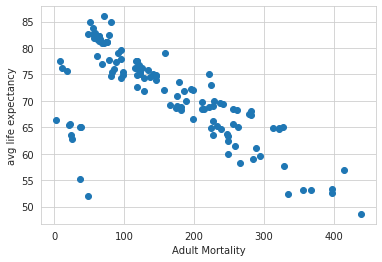

In [ ]:
# type your code here------------------0
sns.set_style('whitegrid')
plt.scatter('Adult_Mortality' ,'Expected', data=df)
plt.xlabel('Adult Mortality')
plt.ylabel('avg life expectancy')
plt.show()


the scatter plot shows that there is a broad trend of decreasing life expectancy with higher adult mortality

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df['Expected']
x=df['Income_Index']


In [ ]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        10:54:09   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
residuals=model.resid
print('Expected error value', residuals.mean())

Expected error value 2.5957730588655274e-14


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y=df['Expected']
x=df[['Polio','Hepatitis','Diphtheria']]


In [ ]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           0.000468
Time:                        11:01:58   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model results show that level of immunization of polio and diphtheria impact the life expectancy positively.
However hepatitis immunization level is not impacting life expectancy.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y=df['Expected']
x=df[['Polio','Status_Developing']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.90
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.09e-10
Time:                        11:09:04   Log-Likelihood:                -416.83
No. Observations:                 124   AIC:                             839.7
Df Residuals:                     121   BIC:                             848.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6009      3.256     21.988      0.000      65.154      78.048
Polio                 0.1008      0.030      3.382      0.001       0.042       0.160
Status_Developing   -10.7587      1.784     -6.030      0.000     -14.291      -7.227
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.859
Skew:                          -0.372   Prob(JB):                        0.239
Kurtosis:                       3.024   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When the information on developing is added we notice only Polio is significant. Hence this information does impact life expectancy. Moreover the model performance has improved as noticed in the improvement of r-squared.


Status developing -  On an average life expectancy of developing country is less by 10.75, comapared to develpoed country.
Polio -  As Coverage of polio immunization increased by 1% life expectancy increased by 0.10.


<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y= df['Expected']
x=df.drop('Expected', axis=1)


In [ ]:

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.94e-36
Time:                        11:18:49   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here


y=df['Expected']
x=df[['GDP','Income_Index']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.44e-33
Time:                        11:30:45   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

y=df['Expected']
x=df[['Income_Index']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        11:31:27   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred=model.predict(xc)
variance = ((y-y_pred)**2).mean()

print('Variance of errors between y and y_pred', variance)

Variance of errors between y and y_pred 20.561167769791123


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here


y=df['Expected']
x=df[['Income_Index']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        11:36:58   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Lower bound and Upper Bound are 37.576 and 47.273

In [ ]:
model.conf_int()

,0,1
const,38.473158,45.365105
Income_Index,37.575806,47.272760


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y=df['Expected']
x=df[['Adult_Mortality']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.27e-20
Time:                        11:44:49   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y=df['Expected']
x=df[['Adult_Mortality','Population']]

xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()


# NO the addition of population would not have any better prediction as the variable population tend out to be insignificant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.74e-19
Time:                        11:45:34   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
cols=['const','Adult_Mortality', 'Hepatitis', 'HIV', 'Population', 'Income_Index','Status_Developing']

In [ ]:
# type your code here

#backward elimination

y= df['Expected']
x=df.drop('Expected', axis=1)

xc=sm.add_constant(x)

xc=xc[cols]
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        11:57:08   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here


y= df['Expected']
x=df.drop('Expected', axis=1)

xc=sm.add_constant(x)

xc=xc[cols]
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        11:58:37   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

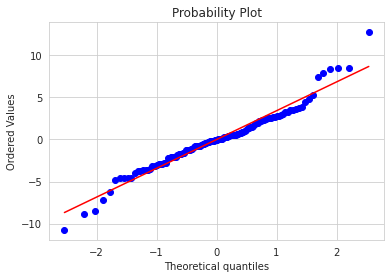

In [ ]:
residuals=model.resid
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

In [ ]:
print(stats.jarque_bera(residuals))

(21.170763466902123, 2.5282913820201536e-05)


H0: Data is normal
H1: Data is not normal

p value is less than significant level so data is not normal

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

y= df['Expected']
x=df.drop('Expected', axis=1)

#xc=sm.add_constant(x)

x['status_gdp']=x['GDP']*x['Status_Developing']
xc=sm.add_constant(x)

model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.14e-36
Time:                        12:08:29   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.5466      3.925     15.935      0.000      54.765      70.328
Adult_Mortality      -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths         0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis             0.0715      0.032      2.259      0.026       0.009       0.134
Measles           -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths     -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria           -0.0446      0.040     -1.124      0.264      -0.123       0.034
HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP               -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population        -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19    -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9       0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index         15.9884      6.392      2.501      0.014       3.315      28.662
Schooling             0.4188      0.343      1.220      0.225      -0.262       1.099
Status_Developing    -3.8250      1.489     -2.569      0.012      -6.777      -0.873
status_gdp            0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#type the code for backward elimination

In [ ]:
cols2=['const','Adult_Mortality', 'Hepatitis', 'HIV', 'Income_Index','status_gdp','Status_Developing']

In [ ]:
model=sm.OLS(y,xc[cols2]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.72
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.07e-43
Time:                        12:11:16   Log-Likelihood:                -328.62
No. Observations:                 124   AIC:                             671.2
Df Residuals:                     117   BIC:                             691.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.7917      3.237     19.400      0.000      56.382      69.202
Adult_Mortality      -0.0244      0.004     -6.281      0.000      -0.032      -0.017
Hepatitis             0.0364      0.016      2.314      0.022       0.005       0.068
HIV                  -1.1482      0.254     -4.527      0.000      -1.650      -0.646
Income_Index         19.3846      3.443      5.630      0.000      12.566      26.203
status_gdp            0.0001   5.02e-05      2.303      0.023    1.62e-05       0.000
Status_Developing    -4.4000      1.236     -3.559      0.001      -6.849      -1.951
==============================================================================
Omnibus:                        3.626   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                4.016
Skew:                           0.104   Prob(JB):                        0.134
Kurtosis:                       3.857   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x.head()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developing,status_gdp
Country,,,,,,,,,,,,,,,,,
Afghanistan,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,1,584.259210
Albania,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,1,4575.763787
Algeria,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,1,4132.762920
Angola,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,1,3695.793748
Argentina,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,1,13467.123600


In [ ]:

y= df['Expected']
x=df.drop('Expected', axis=1)

xc=sm.add_constant(x)

model=sm.OLS(y,xc[cols]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        12:07:26   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the interaction term is sigb=nificant but it is not omproving the model very much.

R-squared increased by 0.001

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here



### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [ ]:
# load the csv file
# type your code here

df2=pd.read_csv('/content/FEV_data.csv')

df2=pd.get_dummies(df2,columns=['Sex','Smoke_habit'],drop_first=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 654 non-null    int64  
 1   Height (cm)         654 non-null    float64
 2   FEV                 654 non-null    float64
 3   Sex_M               654 non-null    uint8  
 4   Smoke_habit_smoker  654 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 16.7 KB


In [ ]:
df2.head()

,Age,Height (cm),FEV,Sex_M,Smoke_habit_smoker
0,16,157.0,1.708,0,1
1,17,167.5,1.724,0,1
2,19,154.5,1.720,0,1
3,16,163.0,1.558,1,1
4,16,157.0,1.895,1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

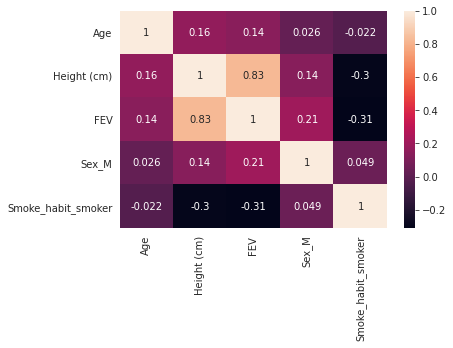

In [ ]:
# type your code here
sns.set_style('whitegrid')
sns.heatmap(df2.corr(), annot=True)
plt.show()

Height has got highest correlation with fev, hence highest impact

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

# impact of smoking habit is negative on the lung capacity
# correlation between fev and smoker is negative

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df2['FEV']
x=df2.drop('FEV', axis=1)
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     379.5
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.78e-168
Time:                        10:11:50   Log-Likelihood:                -439.94
No. Observations:                 654   AIC:                             889.9
Df Residuals:                     649   BIC:                             912.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5268      0.575    -28.727      0.000     -17.656     -15.397
Age                    0.0026      0.007      0.374      0.708      -0.011       0.016
Height (cm)            0.1192      0.003     34.063      0.000       0.112       0.126
Sex_M                  0.1801      0.038      4.769      0.000       0.106       0.254
Smoke_habit_smoker    -0.2231      0.063     -3.515      0.000      -0.348      -0.098
==============================================================================
Omnibus:                      113.397   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.393
Skew:                          -0.625   Prob(JB):                    2.16e-142
Kurtosis:                       7.730   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values, i) for i in range(xc.shape[1])]
pd.DataFrame(vf, index=xc.columns, columns=['vif'])

,vif
const,955.517180
Age,1.028729
Height (cm),1.160690
Sex_M,1.028686
Smoke_habit_smoker,1.111985


As all vif values are less we can conclude that there is no evidence of multicollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
y=df2['FEV']
x=df2.drop(['FEV', 'Age'],axis=1)
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     506.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          1.22e-169
Time:                        10:17:16   Log-Likelihood:                -440.01
No. Observations:                 654   AIC:                             888.0
Df Residuals:                     650   BIC:                             905.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -16.5147      0.574    -28.770      0.000     -17.642     -15.388
Height (cm)            0.1194      0.003     34.613      0.000       0.113       0.126
Sex_M                  0.1801      0.038      4.772      0.000       0.106       0.254
Smoke_habit_smoker    -0.2224      0.063     -3.508      0.000      -0.347      -0.098
==============================================================================
Omnibus:                      113.552   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.676
Skew:                          -0.627   Prob(JB):                    1.88e-142
Kurtosis:                       7.731   Cond. No.                     4.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

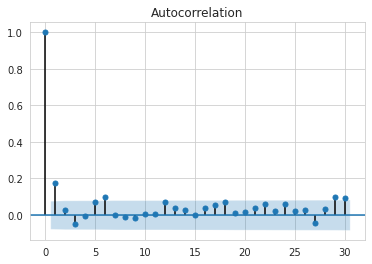

In [ ]:
residuals=model.resid

import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(residuals, lags=30)
acf.show()

ACF plot shows that only lag1 residual correlation is barely higher than level of insignificance. 
Also dw value is 1.649 , based on this we can conclude that there is no serious serial dependency.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

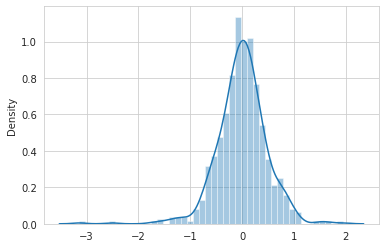

In [ ]:
# type your code here

sns.distplot(residuals)
plt.show()

JB test results are available along with the model results. 
Prob(JB) of 1.88e-142 indicates that we will reject H0 to conclude that residual is not normally distributed.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     216.2
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          8.80e-102
Time:                        10:35:36   Log-Likelihood:                -312.59
No. Observations:                 438   AIC:                             635.2
Df Residuals:                     433   BIC:                             655.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.7696      0.726    -21.719      0.000     -17.197     -14.343
Age                   -0.0003      0.009     -0.038      0.970      -0.017       0.017
Height (cm)            0.1146      0.004     26.041      0.000       0.106       0.123
Sex_M                  0.1726      0.048      3.602      0.000       0.078       0.267
Smoke_habit_smoker    -0.2256      0.080     -2.819      0.005      -0.383      -0.068
==============================================================================
Omnibus:                       86.538   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.582
Skew:                          -0.720   Prob(JB):                    1.31e-101
Kurtosis:                       7.836   Cond. No.                     4.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# type your code here

y=df2['FEV']
X=df2.drop(['FEV','Age'],axis=1)
import statsmodels.api as sm
X_trainc=sm.add_constant(X_train)
model=sm.OLS(y_train,X_trainc).fit()
print(model.summary())

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.33, random_state=42)

X_testc=sm.add_constant(X_test)
y_test_pred=model.predict(X_testc)
mse_test=mean_squared_error(y_test,y_test_pred)
print('\n'*2)
print('mse of test:', mse_test)
print('rmse of test', np.sqrt(mse_test))

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     289.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          4.77e-103
Time:                        10:45:02   Log-Likelihood:                -312.59
No. Observations:                 438   AIC:                             633.2
Df Residuals:                     434   BIC:                             649.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.7714      0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here
mae=mean_absolute_error(y_test, y_test_pred)
print(mae)

mape=(np.abs((y_test-y_test_pred)*100/y_test)).mean()
print('mean absolute percent error',mape)

0.3322560751957922
mean absolute percent error 12.249979667875623


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here


y=df2['FEV']
X=df2.drop(['FEV','Age'],axis=1)
import statsmodels.api as sm
X_trainc=sm.add_constant(X_train)
model=sm.OLS(y_train,X_trainc).fit()
#print(model.summary())

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
X_train, X_test, y_train, y_test = train_test_split(   X, y, test_size=0.2, random_state=6)


y_train_pred=model.predict(X_trainc)
print('r square on train', r2_score(y_train, y_train_pred))
print('rmse on train', np.sqrt(mean_squared_error(y_train, y_train_pred)))

X_testc=sm.add_constant(X_test)
y_test_pred=model.predict(X_testc)
mse_test=mean_squared_error(y_test,y_test_pred)
print('\n'*2)
print('r square on test', r2_score(y_test, y_test_pred))
print('mse of test:', mse_test)
print('rmse of test', np.sqrt(mse_test))

r square on train -0.7244551316658805
rmse on train 1.1200012432101922



r square on test 0.6698489160467713
mse of test: 0.2770105691058037
rmse of test 0.5263179353829809
